In [1]:
# Import libraries
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Import data
raw_data = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

In [67]:
raw_data.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [68]:
# Check for column data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   1259 non-null   int64 
 1   Plan                   1259 non-null   object
 2   Crisis Country         1259 non-null   object
 3   Country Code           1236 non-null   object
 4   Metric                 1259 non-null   object
 5   Value                  1259 non-null   object
 6   Standardised Plan      1259 non-null   object
 7   Appeal Type            974 non-null    object
 8   PiN Value for Dataviz  47 non-null     object
 9   OUSG Metric            619 non-null    object
dtypes: int64(1), object(9)
memory usage: 98.5+ KB


In [69]:
# Convert Value column to int
raw_data['Value'] = raw_data['Value'].str.replace(',', '').astype(int)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   1259 non-null   int64 
 1   Plan                   1259 non-null   object
 2   Crisis Country         1259 non-null   object
 3   Country Code           1236 non-null   object
 4   Metric                 1259 non-null   object
 5   Value                  1259 non-null   int64 
 6   Standardised Plan      1259 non-null   object
 7   Appeal Type            974 non-null    object
 8   PiN Value for Dataviz  47 non-null     object
 9   OUSG Metric            619 non-null    object
dtypes: int64(2), object(8)
memory usage: 98.5+ KB


# Univariate Analysis
Which countries consistently had the highest People in Need (PiN) between 2010 and 2024?

In [70]:
# Select rows with Metric value of "People in need"
people_in_need = raw_data[raw_data['Metric'] == "People in need"]
people_in_need

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
9,2010,Afghanistan,Afghanistan,AFG,People in need,9000000,Afghanistan,NaN,NaN,People in need
12,2010,Afghanistan,Afghanistan,AFG,People in need,7400000,Afghanistan,NaN,NaN,People in need
15,2010,Afghanistan,Afghanistan,AFG,People in need,8100000,Afghanistan,NaN,NaN,People in need
18,2010,Afghanistan,Afghanistan,AFG,People in need,7400000,Afghanistan,Humanitarian Response Plan (HRP),NaN,People in need
21,2010,Afghanistan,Afghanistan,AFG,People in need,6500000,Afghanistan,Humanitarian Response Plan (HRP),NaN,People in need
...,...,...,...,...,...,...,...,...,...,...
1218,2024,Sudan,Sudan,SDN,People in need,3285935,Sudan,RRP,NaN,People in need
1219,2024,Syria (3RP),Syria,SYR,People in need,17200000,Syria (3RP),RRP,NaN,People in need
1220,2024,The Horn of Africa and Yemen (MRP),The Horn of Africa and Yemen,NaN,People in need,1864821,The Horn of Africa and Yemen (MRP),RRP,NaN,People in need
1221,2024,Ukraine,Ukraine,UKR,People in need,2245000,Ukraine,RRP,NaN,People in need


In [71]:
# Get a table for the numbers the affected countries for each year
pin_each_year_country = people_in_need.groupby(['Year', 'Crisis Country'])['Value'].sum().reset_index()
pin_each_year_country

,Year,Crisis Country,Value
0,2010,Afghanistan,58650000
1,2010,Bangladesh,2500000
2,2011,Bangladesh,21380000
3,2011,Benin,3000000
4,2011,Burkina Faso,9754148
...,...,...,...
215,2024,Syria,32500000
216,2024,The Horn of Africa and Yemen,1864821
217,2024,Ukraine,16867301
218,2024,Venezuela,16260421


In [72]:
# Aggregate the total amount for all years grouped by countries
pin_country_totals = pin_each_year_country.groupby(['Crisis Country'])['Value'].sum().reset_index()
pin_country_totals

,Crisis Country,Value
0,Afghanistan,175176152
1,Bangladesh,23880000
2,Benin,3000000
3,Burkina Faso,29125455
4,Burundi,18697677
...,...,...
58,Ukraine,83358721
59,Venezuela,86203221
60,Yemen,225345241
61,Zambia,9790000


In [73]:
# Get ranking based on totals
pin_country_totals['Rank'] = pin_country_totals['Value'].rank(ascending=False)
pin_country_totals

,Crisis Country,Value,Rank
0,Afghanistan,175176152,3.0
1,Bangladesh,23880000,30.0
2,Benin,3000000,53.0
3,Burkina Faso,29125455,26.0
4,Burundi,18697677,34.0
...,...,...,...
58,Ukraine,83358721,10.0
59,Venezuela,86203221,9.0
60,Yemen,225345241,2.0
61,Zambia,9790000,43.0


In [74]:
# Select only the countries ranked top 5 based on totals
top_five_countries = pin_country_totals[pin_country_totals['Rank'] <= 5]
top_five_countries

,Crisis Country,Value,Rank
0,Afghanistan,175176152,3.0
12,Democratic Republic of the Congo,166605753,4.0
16,Ethiopia,127560484,5.0
50,Syria,242599967,1.0
60,Yemen,225345241,2.0


In [76]:
# Select pin_each_year_country data that belongs to the top five in need countries
pin_each_year_top_five_countries = pin_each_year_country[pin_each_year_country['Crisis Country'].isin(top_five_countries['Crisis Country'])]

<Axes: xlabel='Year', ylabel='Value'>

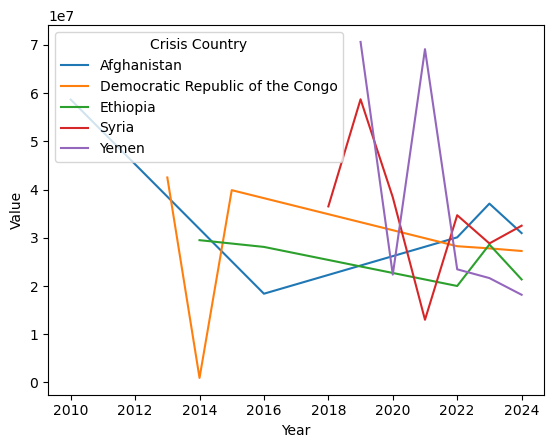

In [77]:
sns.lineplot(data=pin_each_year_top_five_countries, x="Year", y="Value", hue="Crisis Country")

## Answer to the question
Which countries consistently had the highest People in Need (PiN) between 2010 and 2024?
- When ranked by the total number of people in need for all years, Syria has the highest number. However, in the graph of the countries ranked top 5 in the number of People in Need, we can see that Afghanistan and Democratic Republic of the Congo have data spanning spanning from early-2010s to 2024 even though they do not have the highest ranks. Therefore, the two countries more consistently had the highest people in need between 2010 and 2024.

# Bivariate
How is the total number of people targeted compares to people in need in different countries?

In [82]:
pivot_table = pd.pivot_table(raw_data, values='Value', index=['Crisis Country'], columns=['Metric'], aggfunc="sum")[['People in need','People targeted']].fillna(0)
pivot_table

Metric,People in need,People targeted
Crisis Country,,
Afghanistan,175176152.0,22000000.0
Bangladesh,23880000.0,0.0
Benin,3000000.0,0.0
Burkina Faso,29125455.0,7000000.0
Burundi,18697677.0,0.0
...,...,...
Venezuela,86203221.0,0.0
West Africa,0.0,1534832.0
Yemen,225345241.0,17616675.0


In [85]:
# Convert pivot table to a dataframe
pin_vs_pt = pd.DataFrame(pivot_table.to_records())
pin_vs_pt

,Crisis Country,People in need,People targeted
0,Afghanistan,175176152.0,22000000.0
1,Bangladesh,23880000.0,0.0
2,Benin,3000000.0,0.0
3,Burkina Faso,29125455.0,7000000.0
4,Burundi,18697677.0,0.0
...,...,...,...
67,Venezuela,86203221.0,0.0
68,West Africa,0.0,1534832.0
69,Yemen,225345241.0,17616675.0
70,Zambia,9790000.0,0.0


In [88]:
# Add a column that is the sum of both columns
pin_vs_pt['Sum'] = pin_vs_pt['People targeted'] + pin_vs_pt['People in need']
pin_vs_pt.head()

,Crisis Country,People in need,People targeted,Sum,Rank
0,Afghanistan,175176152.0,22000000.0,197176152.0,3.0
1,Bangladesh,23880000.0,0.0,23880000.0,30.0
2,Benin,3000000.0,0.0,3000000.0,55.0
3,Burkina Faso,29125455.0,7000000.0,36125455.0,27.0
4,Burundi,18697677.0,0.0,18697677.0,34.0


In [89]:
# Get ranking based on the sum
pin_vs_pt['Rank'] = pin_vs_pt['Sum'].rank(ascending=False)
pin_vs_pt.head()

,Crisis Country,People in need,People targeted,Sum,Rank
0,Afghanistan,175176152.0,22000000.0,197176152.0,3.0
1,Bangladesh,23880000.0,0.0,23880000.0,30.0
2,Benin,3000000.0,0.0,3000000.0,55.0
3,Burkina Faso,29125455.0,7000000.0,36125455.0,27.0
4,Burundi,18697677.0,0.0,18697677.0,34.0


In [103]:
# Select only the countries ranked top 5 based on the sum
top_five_countries = pin_vs_pt[pin_vs_pt['Rank'] <= 5]
top_five_countries

,Crisis Country,People in need,People targeted,Sum,Rank
0,Afghanistan,175176152.0,22000000.0,197176152.0,3.0
13,Democratic Republic of the Congo,166605753.0,27510000.0,194115753.0,4.0
56,Sudan,121938098.0,15050000.0,136988098.0,5.0
57,Syria,242599967.0,12100000.0,254699967.0,1.0
69,Yemen,225345241.0,17616675.0,242961916.0,2.0


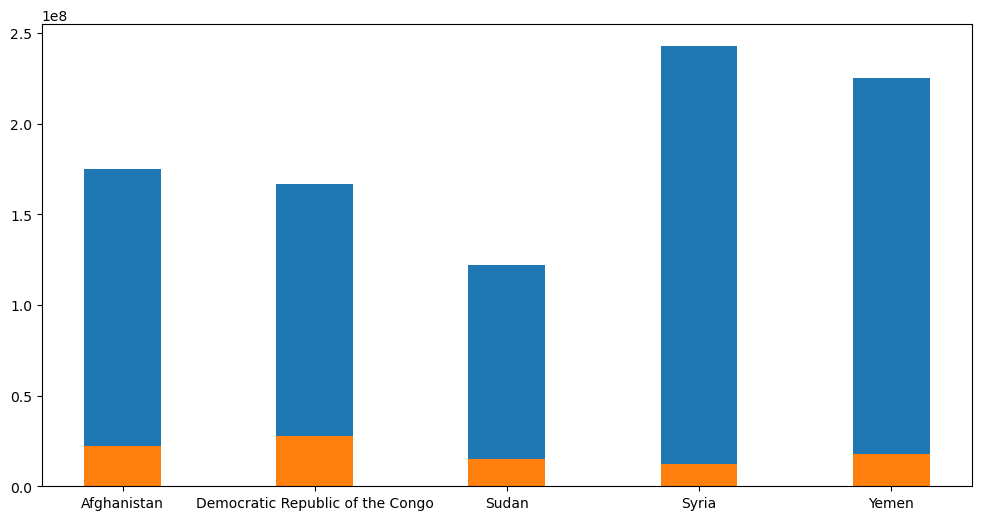

In [115]:
# Plot a stacked bar chart for the top 5 countries
width = 0.40

plt.figure(figsize=(12,6))
plt.bar(top_five_countries['Crisis Country'], top_five_countries['People in need'], width)
plt.bar(top_five_countries['Crisis Country'], top_five_countries['People targeted'], width)
plt.show()

<BarContainer object of 72 artists>

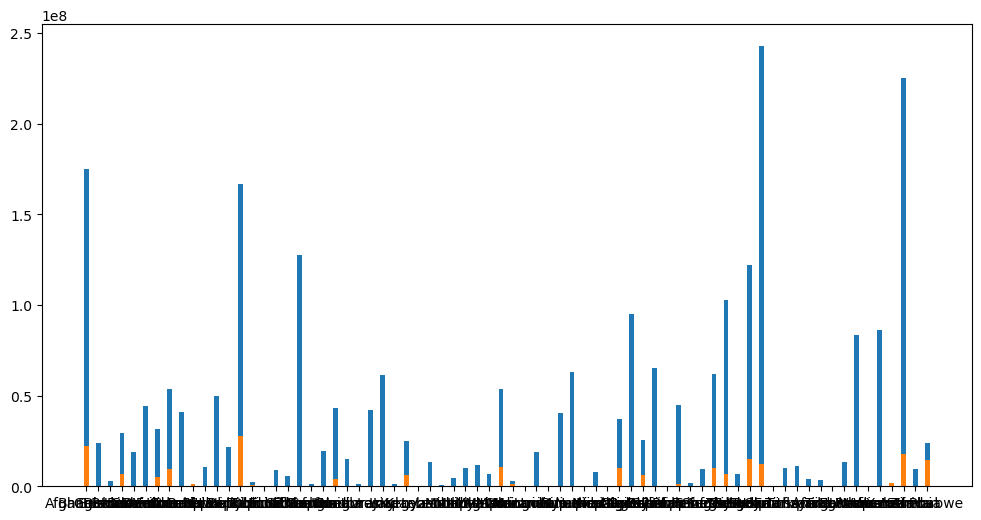

In [112]:
# Plot a stacked bar chart for all countries
plt.figure(figsize=(12,6))
plt.bar(pin_vs_pt['Crisis Country'], pin_vs_pt['People in need'], width)
plt.bar(pin_vs_pt['Crisis Country'], pin_vs_pt['People targeted'], width)

## Answer to the question
How is the total number of people targeted compares to people in need in different countries?
- In both the stacked bar graphs for the top 5 countries and all the countries in the dataset, we see that the numbers for People targeted are consistently lower than People in need.